# Aprendizaje Supervisado

Dataset: [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

Team: Leilani A. y Maria Jose E.

#### Cargando el Dataset

In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [ ]:
# Find the CSV file within the downloaded directory
csv_file = next((f for f in os.listdir(path) if f.endswith('.csv')), None)

# If a CSV file is found, construct the full file path
if csv_file:
    file_path = os.path.join(path, csv_file)

    # Pandas DataFrame
    df = pd.read_csv(file_path)

    print("DataFrame shape:", df.shape)
else:
    print("Ningun archivo CSV fue encontrado en el directorio.")

df.head()

DataFrame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Analisis de Datos

In [ ]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
print('Valores unicos para la columna region:', df['region'].unique())
print('Valores unicos para la columna sex:', df['sex'].unique())
print('Valores unicos para la columna smoker', df['smoker'].unique())

Valores unicos para la columna region: ['southwest' 'southeast' 'northwest' 'northeast']
Valores unicos para la columna sex: ['female' 'male']
Valores unicos para la columna smoker ['yes' 'no']


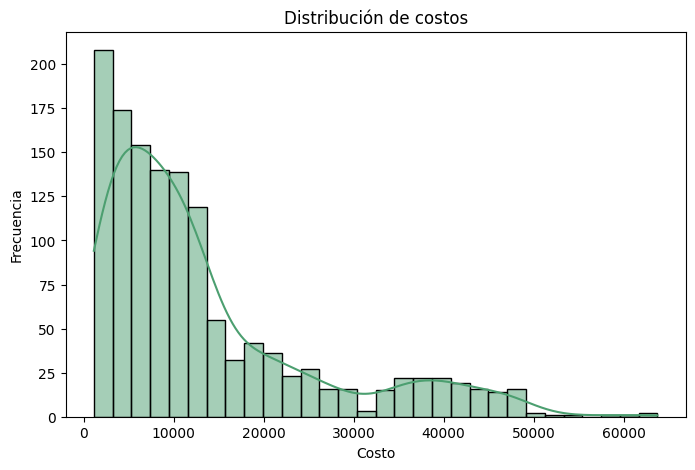

In [ ]:
# Histograma de los CHARGES
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=30, color='#4c9f70')
plt.title('Distribución de costos')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra una distribución sesgada hacia la derecha de los cargos por seguros médicos. Esto significa que:

- La mayoría de las personas tienen costos médicos más bajos, concentrados por debajo de $10,000.
- Una larga cola se extiende hacia la derecha, lo que indica que un número menor de personas incurre en gastos médicos muy altos.
- La curva Kernel Density Estimation (KDE) confirma este sesgo, alcanzando su punto máximo en el extremo inferior y disminuyendo gradualmente hacia costos más altos.

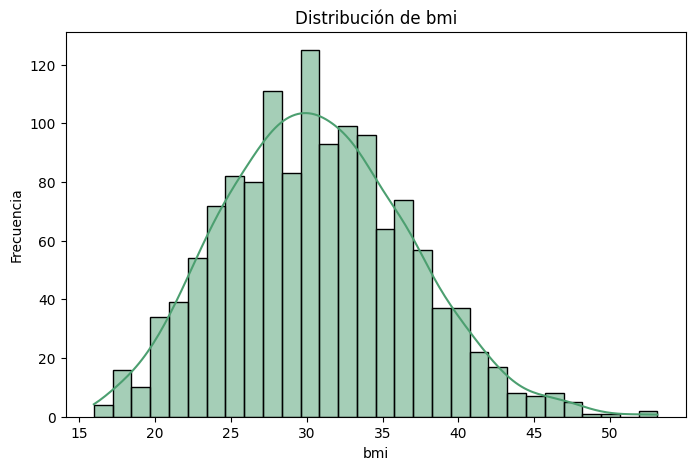

In [ ]:
# Histograma de BMI
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, bins=30, color='#4c9f70')
plt.title('Distribución de bmi')
plt.xlabel('bmi')
plt.ylabel('Frecuencia')
plt.show()

La forma del histograma sugiere una distribución aproximadamente normal 🔔, aunque tambien se podría estar decir que tiene un ligero sesgo positivo.
- Esto significa que la mayoría de las personas en el conjunto de datos tienen BMIs en el rango medio, con menos personas con BMIs muy bajos o muy altos.

- Podemos observar que la barra más alta alrededor de 30 indica que la mayoría de las personas tienen BMIs alrededor de 30 con una frecuencia de 120.

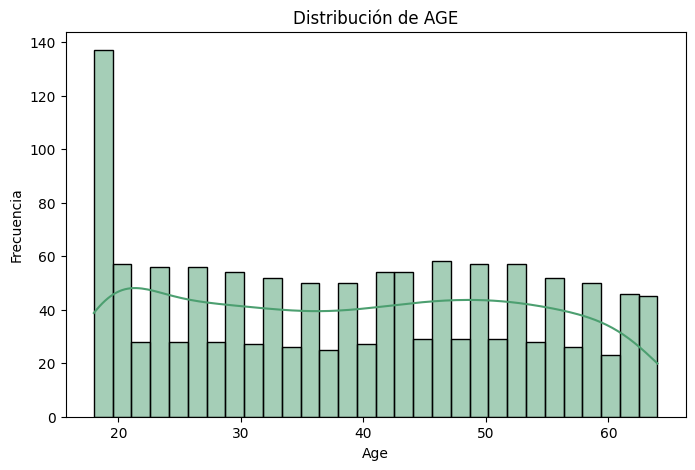

In [ ]:
# Histograma de Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30, color='#4c9f70')
plt.title('Distribución de AGE')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

El histograma muestra una distribución relativamente uniforme en todo el rango de edad, con un ligero pico al final de la adolescencia y principios de los veinte. Los datos no parecen seguir una distribución normal típica 🔔.
- Podemos observar que hay una mayor representación de individuos más jóvenes.


#### Analisis de Columnas Categoricas

<ipython-input-207-eddf4cd0225b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


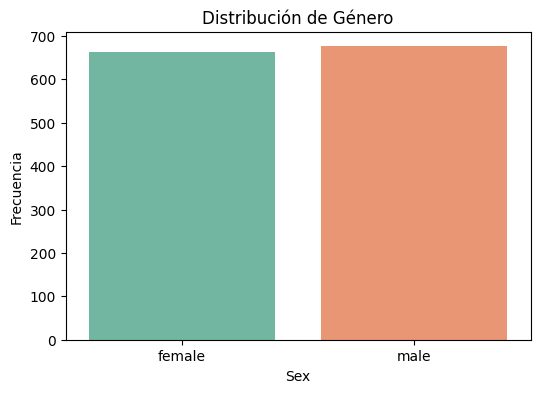

In [ ]:
# Grafico de columna SEX
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='Set2')

plt.title('Distribución de Género')
plt.xlabel('Sex')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

<ipython-input-208-9a523532d623>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='Set2')


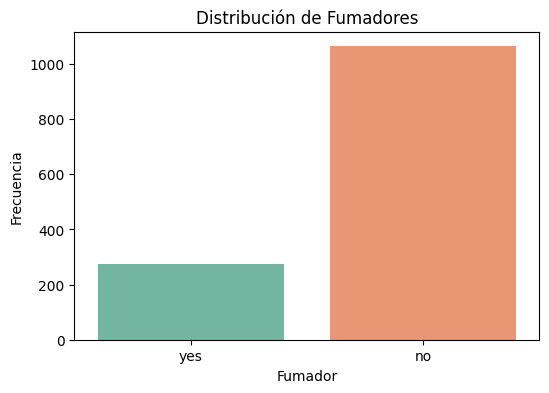

In [ ]:
# Grafico de columna SMOKER
plt.figure(figsize=(6, 4))
sns.countplot(x='smoker', data=df, palette='Set2')

plt.title('Distribución de Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

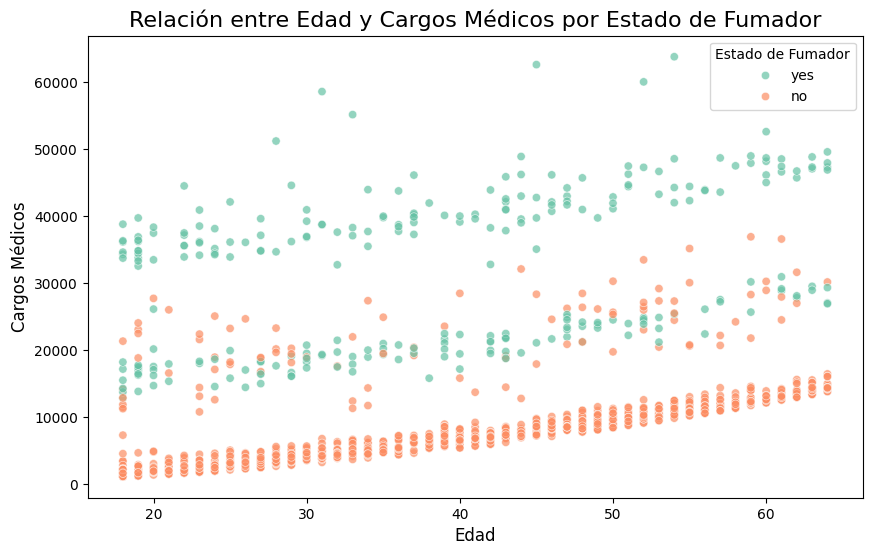

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set2', alpha=0.7)

plt.title('Relación entre Edad y Cargos Médicos por Estado de Fumador', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cargos Médicos', fontsize=12)

# Leyenda para los fumadores y no fumadores
plt.legend(title='Estado de Fumador')
plt.show()

En este gráfico se puede observar que las personas fumadoras tienden a tener cargos médicos más altos en comparación con aquellas que no fuman.

<ipython-input-210-5d93dac5dda7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='Set2')


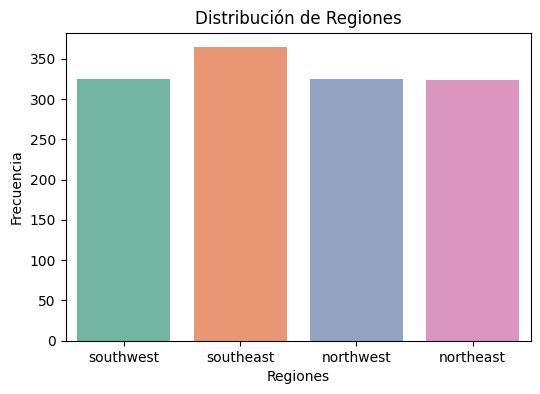

In [ ]:
# Grafico de columna REGION
plt.figure(figsize=(6, 4))
sns.countplot(x='region', data=df, palette='Set2')

plt.title('Distribución de Regiones')
plt.xlabel('Regiones')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

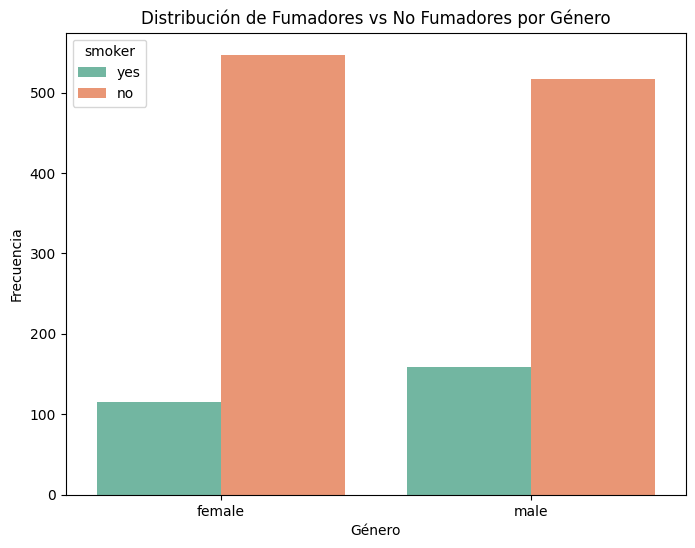

In [ ]:
# Grafico de SEX y SMOKER
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='smoker', data=df, palette='Set2')

plt.title('Distribución de Fumadores vs No Fumadores por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Parte 1:
- Entrenar un modelo de regresión utilizando técnicas de aprendizaje supervisado para predecir los cargos médicos (charges) basándose en sus características.

- Evaluar el rendimiento del modelo utilizando métricas apropiadas, como el error cuadrático medio (MSE) o el coeficiente de determinación (R^2).

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Definiendo características categóricas y numéricas
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']
features = categorical_features + numerical_features
target = 'charges'


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combinar columnas con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
  ])

# Hacer modelo the complete pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [ ]:
print(model.named_steps['preprocessor'].transformers[0][1].named_steps['imputer'].strategy)

mean


In [ ]:
# Test y Train
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

# Entrenando el modelo. Siempre sobre Train
model.fit(X_train, y_train)

# Realizando predicciones en los datos de Test
y_pred = model.predict(X_test)

# Calculando el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error Test: \t{mse}")

# Realizando predicciones en los datos de Train
y_pred_train = model.predict(X_train)

# Calculando el error cuadrático medio (MSE) en el conjunto de entrenamiento
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error Train: \t{mse}")

Mean Squared Error Test: 	33596915.851361476
Mean Squared Error Train: 	37277681.70201867


Explicación:

Tras entrenar el modelo, evaluamos su precisión con el Error Cuadrático Medio (MSE). Este mide la diferencia promedio al cuadrado entre los cargos médicos reales y las predicciones del modelo. Nos da una idea de la magnitud del error promedio en nuestras predicciones.

* Al **Test** tener un valor menor, nos indica que el modelo no esta sobreajustado (***overfitting***).
* La minima diferencia entre los valores de MSE de Test y Train es una buena señal. Nos indica que el modelo no está sobreajustado y está manejando tanto los datos de Train como los de Test de manera bastante consistente.

In [ ]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"R² en los datos de entrenamiento: {r2_train}")
print(f"R² en los datos de prueba: {r2_test}")

R² en los datos de entrenamiento: 0.7417255854683333
R² en los datos de prueba: 0.7835929767120722


Explicación:

R² nos indica qué proporción de la varianza en los cargos médicos (nuestra variable Target) es explicada por nuestro modelo, basado en las características que utilizamos (edad, bmi, número de hijos, si es fumador, región y sexo). Un R-cuadrado más cercano a 1 indica un mejor ajuste, lo que significa que el modelo es capaz de predecir los cargos médicos con mayor precisión.

* R² en los datos de entrenamiento: El modelo explica aproximadamente el 74.2% de la variabilidad de los datos de entrenamiento.

* R² en los datos de prueba: El modelo explica aproximadamente el 78.4% de la variabilidad en los datos de prueba.

Es una buena señal que el R² en los datos de prueba sea mayor al de los datos de entrenamiento. Significa que el modelo está aprendiendo patrones que pueda aplicar a nuevos datos y no solo utilizando el conocimiento aprendido en Test.

Sin embargo, si el R² en los datos de prueba es considerablemente mayor que en el entrenamiento, esto podría indicar que la muestra de prueba no es representativa o que existe un problema en el modelo.

El 22% de la variabilidad que no es explicada por el modelo, se podría deberse por otros factores no incluidos en nuestro modelo. Por ejemplo, condiciones médicas preexistentes o incluso errores aleatorios.

La variabilidad restante en ambos conjuntos de datos está entre el 21% y el 26%, y puede darse por otros factores como:
* Condiciones medicas preexistentes
* Errores aleatorios
* Ruido en los datos
* Complejidades no capturadas por el modelo


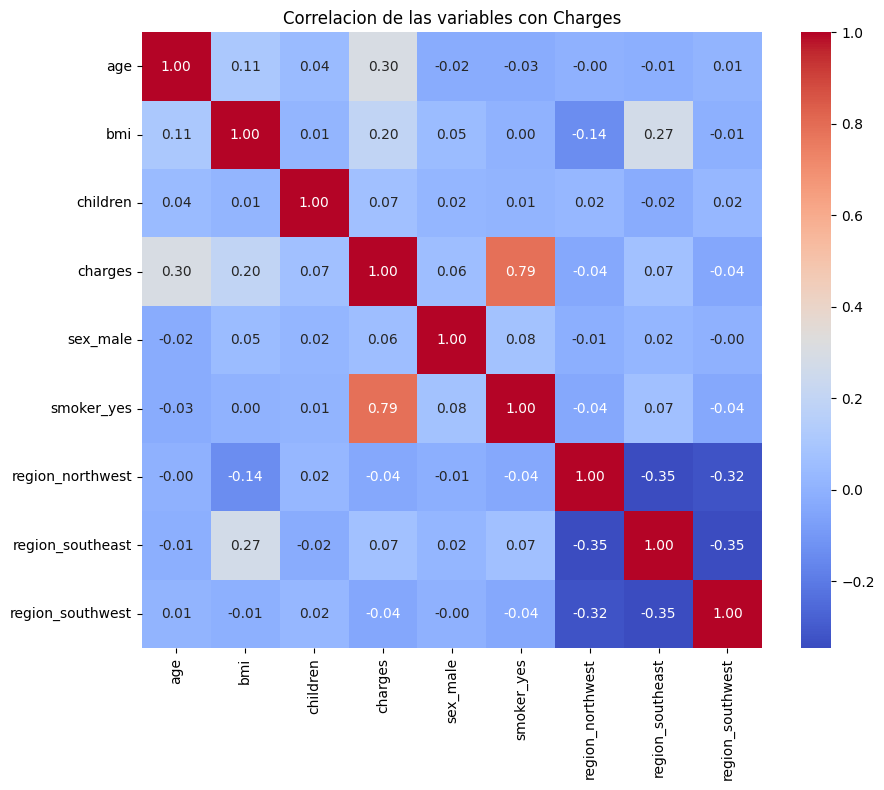

In [ ]:
# One-Hot Encoding para variables categoricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Matriz de correlacion
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlacion de las variables con Charges')
plt.show()

Observaciones de la matriz:
* En la matriz de correlacion podemos observar que ser fumador tiene el mayor impacto en los cargos medicos con una fuerte correlacion de 0.79.
* Además, se observa una relación positiva entre la edad y los cargos médicos (0.30), los costos tienden a aumentar a medida que las personas envejecen.
* La region no es un factor determinante en los costos medicos.

### Parte 2:
- Crear una nueva categorización de dureza dividida en tres grupos iguales basados en los valores de la variable de regresión (charges).

- Utilizando esta nueva categorización, entrena un modelo de clasificación para predecir a qué grupo pertenece un mineral basándose en sus características.

- Evaluar el rendimiento del modelo utilizando métricas apropiadas, como la precisión, recall o la matriz de confusión.

#### Opción 1:

In [ ]:
# CHARGES MIN TO MAX
df = df.sort_values('charges')

# DIVED CHARGES 3 TIMES
n = len(df)
# CUTOFF POINTS
#  DIVIDE THE DATA INTO 3 EQUAL-SIZED GROUPS (low, medium, and high) BASED ON THE VALUES IN THE CHARGES
cutoff1 = n // 3
cutoff2 = 2 * n // 3
df['charges_group'] = pd.qcut(df['charges'], q=3, labels=[1, 2, 3], duplicates='drop')
df.loc[:cutoff1, 'charges_group'] = 1
df.loc[cutoff1:cutoff2, 'charges_group'] = 2
df.loc[cutoff2:, 'charges_group'] = 3

# 'Charges_Category' COLUMN
df['Charges_Category'] = pd.qcut(df['charges'], q=3, labels=["Bajo", "Mediano", "Alto"])

In [ ]:
print(df['charges_group'].value_counts())

charges_group
1    735
3    603
2      0
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# TRAIN & SPLIT
X = df.drop(['charges', 'charges_group', 'Charges_Category'], axis=1)
y = df['charges_group']

# ONE-HOT ENCODING FOR CATEGORICAL FEATURES
X = pd.get_dummies(X, columns=['smoker', 'region', 'sex'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Decision Tree

In [ ]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\n Confusion Matrix: ")
print(cm)
print("\n Classification Report:")
print(report)

Accuracy: 0.91

 Confusion Matrix: 
[[137   7]
 [ 17 107]]

 Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       144
           3       0.94      0.86      0.90       124

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



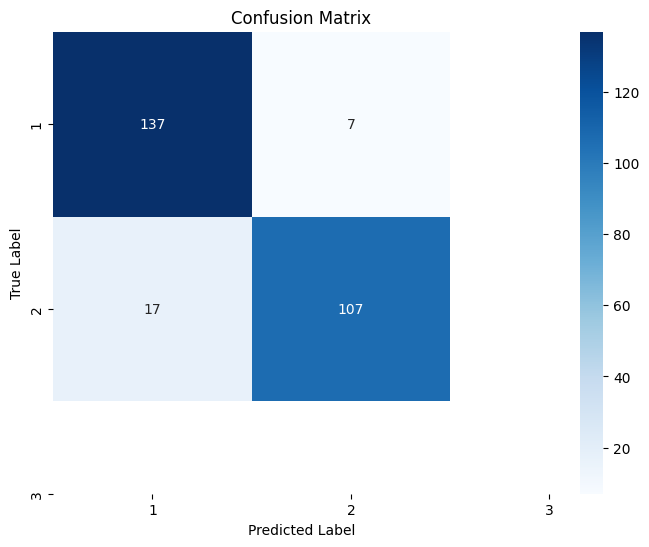

In [ ]:
# CONFUSION MATRIX VISUALIZATION
class_names = [1, 2, 3]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Valores:

- 137: Este es el número de muestras que realmente pertenecían a la categoría 1, y el modelo correctamente predijo la categoría 1. `TP`

- 7: Este es el número de muestras que realmente pertenecían a la categoría 1, pero el modelo incorrectamente predijo la categoría 2. `FN`

- 17: Este es el número de muestras que realmente pertenecían a la categoría 2, pero el modelo incorrectamente predijo la categoría 1. `FN`

- 107: Este es el número de muestras que realmente pertenecían a la categoría 2, y el modelo correctamente predijo la categoría 2. `TP`

Análisis del Rendimiento por Clase:

- Clase 1: El modelo predice correctamente 137 de las 144 muestras de la clase 1 (137 + 7 = 144), fallando solo en 7 casos. Esto nos da una precisión del 95.1% (137 / 144 ≈ 0.951).

- Clase 2: El modelo predice correctamente 107 de las 124 muestras de la clase 2 (107 + 17 = 124), fallando en 17 casos. Esto nos da una precisión del 86.3% (107 / 124 ≈ 0.863).

En resumen: El modelo tiene un buen rendimiento en general, aunque la precisión es ligeramente mejor para la clase 1 que para la clase 2. Esto significa que el modelo es más preciso al clasificar muestras como pertenecientes a la clase 1 que a la clase 2.

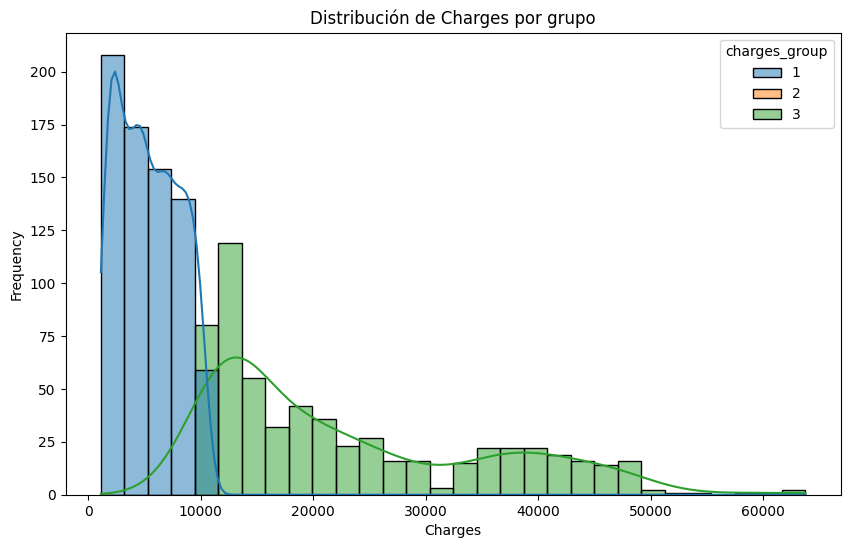

In [ ]:
# CHARGES BY GROUP
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="charges", hue="charges_group", kde=True)
plt.title('Distribución de Charges por grupo')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

- `Grupo 1`: Representan la distribución de los cargos médicos para los individuos en el grupo 1. La distribución está fuertemente sesgada hacia la derecha (sesgo positivo). La mayoría de los individuos en este grupo tienen cargos por debajo de 10,000. Hay una brusca caída en la frecuencia a medida que aumentan los cargos.

- `Grupo 2`: Representan la distribución de los cargos médicos para los individuos en el grupo 2.La distribución también está sesgada hacia la derecha, pero con menor intensidad que el Grupo 1. Los cargos están más dispersos en comparación con el Grupo 1. Hay un pico notable en el rango de 10,000 a 20,000.

- `Grupo 3`: Representan la distribución de los cargos médicos para los individuos en el grupo 3.La distribución es la menos sesgada de las tres. Abarca un rango más amplio de cargos, aunque la frecuencia es menor para los valores de cargos más altos.


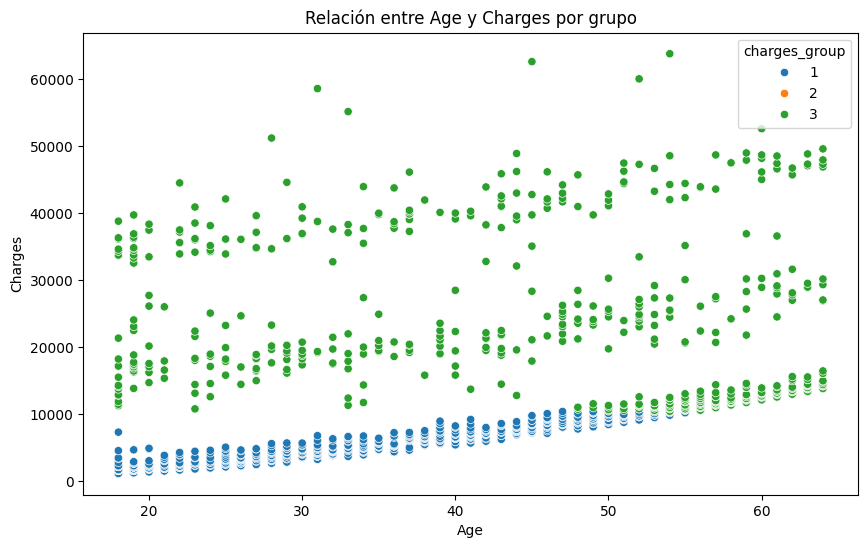

In [ ]:
# CHARACTERISTICS & GROUPS OF CHARGES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="charges", hue="charges_group")
plt.title('Relación entre Age y Charges por grupo')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

- Azul (Grupo 1): El grupo con los cargos más bajos.
- Naranja (Grupo 2): El grupo con cargos medios.
- Verde (Grupo 3): El grupo con los cargos más altos.


---


- Concentración del Grupo 1: El Grupo 1 (azul) se concentra en la parte inferior del eje de cargos, lo que confirma que este grupo corresponde a individuos con menores gastos médicos.

- Dispersión de los Grupos 2 y 3: Los Grupos 2 (naranja) y 3 (verde) muestran una mayor dispersión a lo largo del eje de cargos, y el Grupo 3 se extiende hasta los valores de cargos más altos.

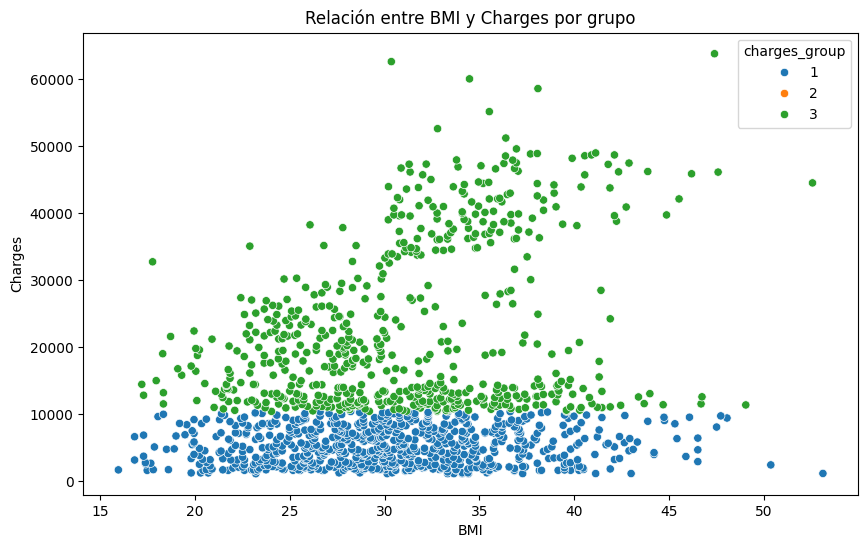

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bmi", y="charges", hue="charges_group")
plt.title('Relación entre BMI y Charges por grupo')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

- Concentración del Grupo 1: El Grupo 1 (azul) se concentra en la parte inferior del eje de cargos, lo que confirma que este grupo corresponde a individuos con menores gastos médicos. Además, se observa que tienen un rango de BMI más limitado.

- Dispersión de los Grupos 2 y 3: Los Grupos 2 (naranja) y 3 (verde) muestran una mayor dispersión a lo largo del eje de cargos, y el Grupo 3 se extiende hasta los valores de cargos más altos. También tienen un rango de BMI más amplio que el Grupo 1.

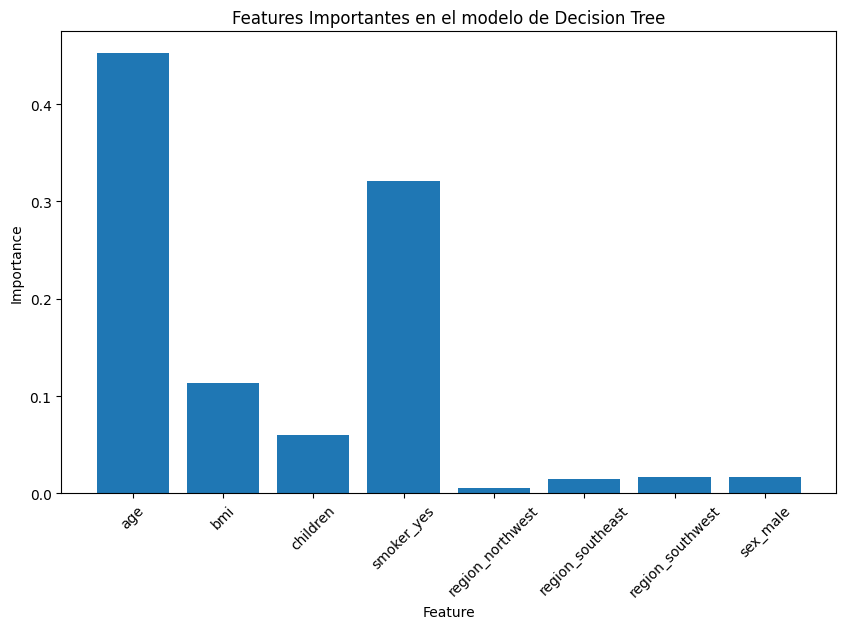

In [ ]:
# CLASSIFICATION
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
features = X.columns
plt.bar(features, feature_importances)
plt.title('Features Importantes en el modelo de Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

- `smoker_yes`: La característica smoker_yes tiene la importancia más alta, lo que indica que ser fumador es el factor más importante para determinar los cargos médicos, ya que las aseguradoras lo consideran como alguien de mayor riesgo ya que hay más riesgos asociados (enfermedades crónicas, problemas de salud cardíaca, respiratoria) con el tabaquismo, lo que a su vez le cuesta más dinero a la aseguradora. La representación gráfica con la barra más alta refleja esta importancia.


- `age`: La edad también tiene una importancia relativamente alta, aunque significativamente menor que la de smoker_yes.

- `BMI` y `children`: Estas características tienen una importancia moderada.

- `Regiones` y `sex_male`: Las características relacionadas con la región y el sexo tienen una importancia relativamente baja en comparación con las demás. Esto sugiere que estas variables tienen un impacto menor en la predicción de los cargos médicos en este modelo.

##### Random Forest

In [ ]:
# RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# TRAIN MODEL
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# PREDICT TEST
y_pred_rf = rf_model.predict(X_test)

# ACCURACY SCORE
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# CONFUSION MATRIX
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n Confusion Matrix (Random Forest):")
print(cm_rf)

# CLASSIFICATION REPORT
report_rf = classification_report(y_test, y_pred_rf)
print("\n Classification Report (Random Forest):")
print(report_rf)

Random Forest Accuracy: 0.94

 Confusion Matrix (Random Forest):
[[143   1]
 [ 15 109]]

 Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       144
           3       0.99      0.88      0.93       124

    accuracy                           0.94       268
   macro avg       0.95      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



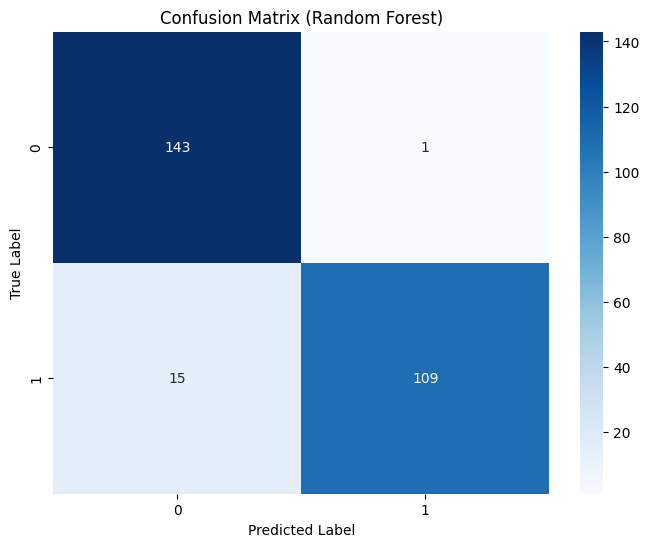

In [ ]:
# CONFUSION MATRIX VISUALIZATION
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

# TRAIN
logreg.fit(X_train, y_train)

# MAKE PREDICTIONS
y_pred_logreg = logreg.predict(X_test)

# EVALUATE MODEL
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy de la Regresión Logística: {accuracy_logreg:.2f}")

# MATRIX
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("\nMatriz de Confusión de la Regresión Logística: ")
print(cm_logreg)

# CLASSIFICATION
report_logreg = classification_report(y_test, y_pred_logreg)
print("\nReporte de Clasificación de la Regresión Logística:")
print(report_logreg)

Accuracy de la Regresión Logística: 0.91

Matriz de Confusión de la Regresión Logística: 
[[133  11]
 [ 13 111]]

Reporte de Clasificación de la Regresión Logística:
              precision    recall  f1-score   support

           1       0.91      0.92      0.92       144
           3       0.91      0.90      0.90       124

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



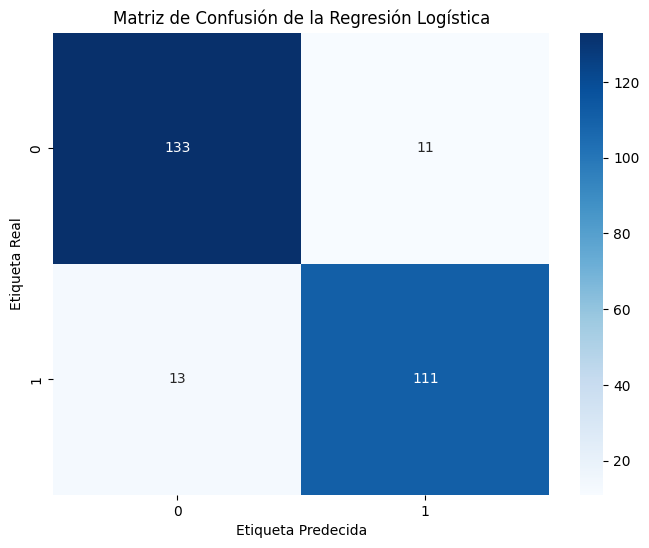

In [ ]:
# MATRIX
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión de la Regresión Logística")
plt.xlabel("Etiqueta Predecida")
plt.ylabel("Etiqueta Real")
plt.show()

#### Opción 2:

In [ ]:
# Creando una nueva categorizacion, dividada en 3 grupos. Basado en cuartiles
df['Charges_Category'] = pd.qcut(df['charges'], q=3, labels=["Bajo", "Mediano", "Alto"])

# Mostrar la columna nueva
df[['charges', 'Charges_Category']].head()

,charges,Charges_Category
940,1121.8739,Bajo
808,1131.5066,Bajo
1244,1135.9407,Bajo
663,1136.3994,Bajo
22,1137.0110,Bajo


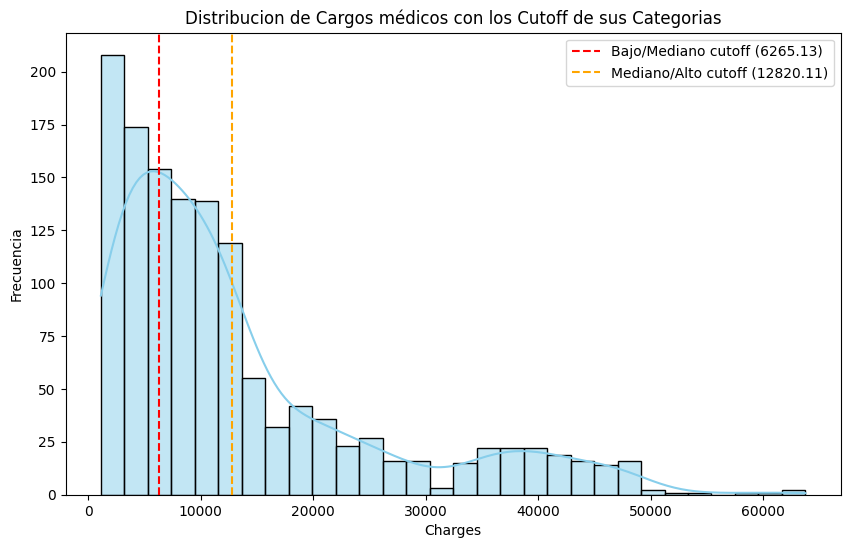

In [ ]:
# Histograma con la distribucion de Charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color="skyblue", bins=30)

# Mostrar donde cada grupo se corta
low_cut = df['charges'].quantile(1/3)
medium_cut = df['charges'].quantile(2/3)

# Añadiendo lineas en el cutoff
plt.axvline(low_cut, color='red', linestyle='--', label=f'Bajo/Mediano cutoff ({low_cut:.2f})')
plt.axvline(medium_cut, color='orange', linestyle='--', label=f'Mediano/Alto cutoff ({medium_cut:.2f})')

plt.title("Distribucion de Cargos médicos con los Cutoff de sus Categorias")
plt.xlabel("Charges")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

##### Random Forest

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['Charges_Category']  # Etiquetas

# Preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

# Creando pipeline de clasificación RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el model
pipeline.fit(X_train, y_train)

# Hacer prediciones
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# precision, recall, F1 score
report = classification_report(y_test, y_pred)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nReporte:")
print(report)
print("\nMatriz de Confusión:")
print(conf_matrix)

Accuracy: 0.8992537313432836

Reporte:
              precision    recall  f1-score   support

        Alto       0.96      0.80      0.88        87
        Bajo       0.91      0.96      0.93        91
     Mediano       0.85      0.93      0.89        90

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268


Matriz de Confusión:
[[70  5 12]
 [ 1 87  3]
 [ 2  4 84]]


##### Regresión Logística

In [ ]:
# REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['Charges_Category']

# Preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

# Creando pipeline de clasificación LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# precision, recall, F1 score
report = classification_report(y_test, y_pred)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nReporte:")
print(report)
print("\nMatriz de Confusión:")
print(conf_matrix)

Accuracy: 0.8544776119402985

Reporte:
              precision    recall  f1-score   support

        Alto       1.00      0.62      0.77        87
        Bajo       0.92      0.97      0.94        91
     Mediano       0.74      0.97      0.84        90

    accuracy                           0.85       268
   macro avg       0.88      0.85      0.85       268
weighted avg       0.88      0.85      0.85       268


Matriz de Confusión:
[[54  5 28]
 [ 0 88  3]
 [ 0  3 87]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


##### Decision Tree

In [ ]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['Charges_Category']

# Preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

# Creando pipeline de clasificación DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# precision, recall, F1 score
report = classification_report(y_test, y_pred)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nReporte:")
print(report)
print("\nMatriz de Confusión:")
print(conf_matrix)

Accuracy: 0.8208955223880597

Reporte:
              precision    recall  f1-score   support

        Alto       0.76      0.83      0.79        87
        Bajo       0.88      0.89      0.89        91
     Mediano       0.83      0.74      0.78        90

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268


Matriz de Confusión:
[[72  6  9]
 [ 5 81  5]
 [18  5 67]]


#### Conclusión

Al analizar los modelos Random Forest, Regresión Logística y Decision Tree podemos concluir que el modelo **Random Forest** es el más adecuado para esta dataset.

* Tiene el mayor accuracy de todos.
* Tiene una precisión más alta que los demás modelos. Tiene mejor capacidad para predecir los resultados correctos.
* Mantiene un buen recall en los tres grupos sin comprometer el rendimiento en ninguna de ellas Capaz de detectar la mayoría de los casos positivos sin sacrificar precisión.
* Ofrece el mejor balance entre precisión, recall y f1-score entre todos los modelos.


En cuanto a la diferencia en los resultados de cada modelo entre las dos opciones realizadas en la **Parte 2**, se debe a cómo se dividió en tres grupos la categoría "Charges".

En la **Opción 1**, "Charges" se agrupó en tres grupos iguales sin considerar la distribución de los valores. Esto significa que un grupo podría tener valores muy dispares, mientras que otro podría tener valores similares. Esta opción funciona bien si los datos están distribuidos uniformemente, pero si los datos de "Charges" están sesgados, la agrupación podría quedar desbalanceada.

En la **Opción 2**, el uso de qcut() divide los datos en tres grupos con igual frecuencia, tomando en cuenta la distribución. Esto es útil cuando los datos de "Charges" están sesgados, ya que garantiza una distribución más equilibrada, lo que resulta en modelos de clasificación más robustos.

En conclusión, el modelo Random Forest es el más adecuado para esta dataset debido a su alta precisión, recall y f1-score. La forma en que se dividió la categoría "Charges" puede afectar los resultados de los modelos, por lo que es importante considerar la distribución de los valores al realizar la agrupación.